# Naive Bayes: Classificazione basata su Probabilità

In questo notebook esploreremo l'algoritmo Naive Bayes, un potente classificatore probabilistico basato sul teorema di Bayes.

- Implementeremo Naive Bayes da zero seguendo i concetti teorici
- Vedremo come funziona su diversi tipi di dataset
- Analizzeremo alcune varianti e ottimizzazioni

## 1. Introduzione all'Apprendimento basato su Probabilità

L'apprendimento probabilistico si basa su concetti fondamentali di teoria della probabilità:

- Frequenze relative
- Probabilità condizionate
- Regola del prodotto
- Regola della catena
- Teorema della probabilità totale


In [1]:
%pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

### Creazione di un esempio semplice

Creiamo un semplice dataset che classifica le email come spam o non spam basato sulla presenza di alcune parole chiave:


In [5]:
# Creiamo un dataset di classificazione di email
data = {
    'id': range(1, 11),
    'contiene_offerta': [True, False, True, False, True, True, False, True, False, True],
    'contiene_sconto': [True, False, True, True, False, True, False, False, True, True],
    'contiene_allegato': [True, False, False, True, False, True, False, False, True, True],
    'is_spam': [True, False, True, False, False, True, False, False, False, True]
}

# Creiamo un DataFrame
df = pd.DataFrame(data)
print("Dataset di classificazione email:")
print(df)

Dataset di classificazione email:
   id  contiene_offerta  contiene_sconto  contiene_allegato  is_spam
0   1              True             True               True     True
1   2             False            False              False    False
2   3              True             True              False     True
3   4             False             True               True    False
4   5              True            False              False    False
5   6              True             True               True     True
6   7             False            False              False    False
7   8              True            False              False    False
8   9             False             True               True    False
9  10              True             True               True     True


### Calcolo di probabilità semplici

Vediamo come calcolare alcune probabilità di base dal nostro dataset:

In [11]:
# Numero totale di email
n_email = len(df)

# Probabilità non condizionate (prior)
p_spam = df['is_spam'].mean()
####sarebbe numero_di_spam / numero_totale_email
p_offerta = df['contiene_offerta'].mean()
p_sconto = df['contiene_sconto'].mean()
p_allegato = df['contiene_allegato'].mean()

print(f"\nProbabilità di spam: P(spam) = {p_spam:.2f}")
print(f"Probabilità di 'contiene_offerta': P(offerta) = {p_offerta:.2f}")
print(f"Probabilità di 'contiene_sconto': P(sconto) = {p_sconto:.2f}")
print(f"Probabilità di 'contiene_allegato': P(allegato) = {p_allegato:.2f}")


Probabilità di spam: P(spam) = 0.40
Probabilità di 'contiene_offerta': P(offerta) = 0.60
Probabilità di 'contiene_sconto': P(sconto) = 0.60
Probabilità di 'contiene_allegato': P(allegato) = 0.50


In [12]:

# Probabilità condizionate
p_offerta_dato_spam = df[df['is_spam'] == True]['contiene_offerta'].mean()
p_sconto_dato_spam = df[df['is_spam'] == True]['contiene_sconto'].mean()
p_allegato_dato_spam = df[df['is_spam'] == True]['contiene_allegato'].mean()

print(f"\nProbabilità di 'offerta' dato spam: P(offerta|spam) = {p_offerta_dato_spam:.2f}")
print(f"Probabilità di 'sconto' dato spam: P(sconto|spam) = {p_sconto_dato_spam:.2f}")
print(f"Probabilità di 'allegato' dato spam: P(allegato|spam) = {p_allegato_dato_spam:.2f}")


Probabilità di 'offerta' dato spam: P(offerta|spam) = 1.00
Probabilità di 'sconto' dato spam: P(sconto|spam) = 1.00
Probabilità di 'allegato' dato spam: P(allegato|spam) = 0.75


occhio! Tutte le spam hanno offerte, ma non tutte le offerte hanno spam. Stesso discorso vale per sconto

### Probabilità congiunta ed esempi della regola del prodotto

Le probabilità congiunte rappresentano la probabilità che due eventi si verifichino insieme.

In [ ]:
# Probabilità congiunte
p_spam_e_offerta = df[(df['is_spam'] == True) & (df['contiene_offerta'] == True)].shape[0] / n_email
p_spam_e_sconto = df[(df['is_spam'] == True) & (df['contiene_sconto'] == True)].shape[0] / n_email
p_spam_e_allegato = df[(df['is_spam'] == True) & (df['contiene_allegato'] == True)].shape[0] / n_email

print(f"\nProbabilità congiunta di spam e offerta: P(spam, offerta) = {p_spam_e_offerta:.2f}")
print(f"Probabilità congiunta di spam e sconto: P(spam, sconto) = {p_spam_e_sconto:.2f}")
print(f"Probabilità congiunta di spam e allegato: P(spam, allegato) = {p_spam_e_allegato:.2f}")

# Verifichiamo la regola del prodotto: P(A,B) = P(A|B) * P(B)
p_offerta_dato_spam_per_p_spam = p_offerta_dato_spam * p_spam
print(f"\nVerifica della regola del prodotto:")
print(f"P(offerta|spam) * P(spam) = {p_offerta_dato_spam_per_p_spam:.2f}")
print(f"P(offerta, spam) = {p_spam_e_offerta:.2f}")

# Teorema della probabilità totale per la presenza di offerta
p_offerta_dato_spam = df[df['is_spam'] == True]['contiene_offerta'].mean()
p_offerta_dato_non_spam = df[df['is_spam'] == False]['contiene_offerta'].mean()

p_offerta_teorema_totale = p_offerta_dato_spam * p_spam + p_offerta_dato_non_spam * (1 - p_spam)
print(f"\nProbabilità di offerta usando il teorema della probabilità totale: {p_offerta_teorema_totale:.2f}")
print(f"Probabilità effettiva di offerta: {p_offerta:.2f}")


Probabilità congiunta di spam e offerta: P(spam, offerta) = 0.40
Probabilità congiunta di spam e sconto: P(spam, sconto) = 0.40
Probabilità congiunta di spam e allegato: P(spam, allegato) = 0.30

Verifica della regola del prodotto:
P(offerta|spam) * P(spam) = 0.40
P(spam, offerta) = 0.40

Probabilità di offerta usando il teorema della probabilità totale: 0.60
Probabilità effettiva di offerta: 0.60


### Visualizzazione delle probabilità condizionate

In [ ]:
# Visualizziamo le probabilità condizionate
condizionate = {
    'Caratteristica': ['Offerta', 'Sconto', 'Allegato'],
    'P(caratteristica|spam)': [p_offerta_dato_spam, p_sconto_dato_spam, p_allegato_dato_spam],
    'P(caratteristica|non spam)': [
        df[df['is_spam'] == False]['contiene_offerta'].mean(),
        df[df['is_spam'] == False]['contiene_sconto'].mean(),
        df[df['is_spam'] == False]['contiene_allegato'].mean()
    ]
}

df_condizionate = pd.DataFrame(condizionate)
print("\nProbabilità condizionate delle caratteristiche:")
print(df_condizionate)


Probabilità condizionate delle caratteristiche:
  Caratteristica  P(caratteristica|spam)  P(caratteristica|non spam)
0        Offerta                    1.00                    0.333333
1         Sconto                    1.00                    0.333333
2       Allegato                    0.75                    0.333333


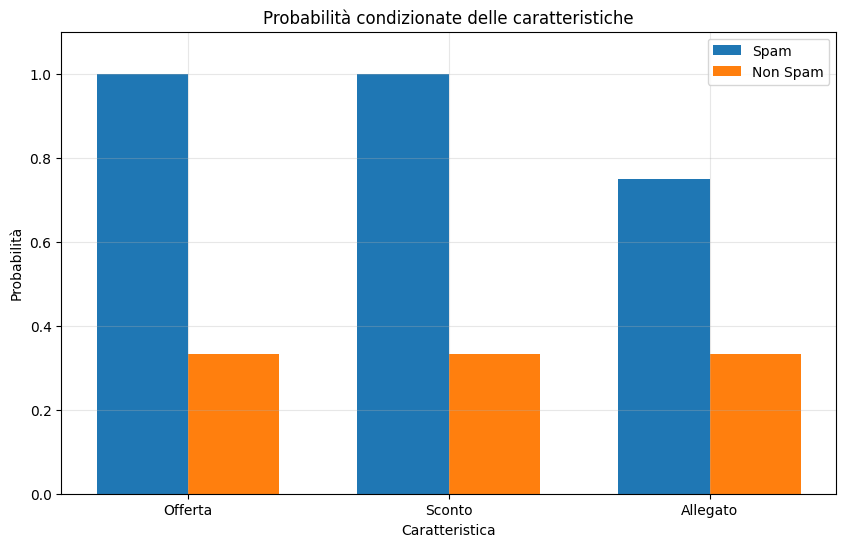

In [ ]:
# Creiamo un grafico a barre delle probabilità condizionate
plt.figure(figsize=(10, 6))
x = np.arange(len(df_condizionate['Caratteristica']))
width = 0.35

plt.bar(x - width/2, df_condizionate['P(caratteristica|spam)'], width, label='Spam')
plt.bar(x + width/2, df_condizionate['P(caratteristica|non spam)'], width, label='Non Spam')

plt.xlabel('Caratteristica')
plt.ylabel('Probabilità')
plt.title('Probabilità condizionate delle caratteristiche')
plt.xticks(x, df_condizionate['Caratteristica'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

plt.show()

# 2. Il Teorema di Bayes e la Classificazione

Il teorema di Bayes è fondamentale per capire come funziona il classificatore Naive Bayes. Esso fornisce un modo per calcolare la probabilità di una classe dato un insieme di caratteristiche.

## 2.1 Il Teorema di Bayes

Il teorema di Bayes afferma che la probabilità che un evento $X$ si verifichi data un'evidenza $Y$ è proporzionale alla probabilità che l'evidenza $Y$ sia causata dall'evento $X$ moltiplicata per la probabilità dell'evento $X$ stesso:

$$P(X|Y) = \frac{P(Y|X) \times P(X)}{P(Y)}$$

Dove:
- $P(X|Y)$ è la probabilità a posteriori dell'evento $X$ dato $Y$
- $P(Y|X)$ è la probabilità (verosimiglianza) dell'evidenza $Y$ dato l'evento $X$
- $P(X)$ è la probabilità a priori dell'evento $X$
- $P(Y)$ è la probabilità marginale dell'evidenza $Y$

Nel contesto della classificazione, possiamo riscrivere il teorema come:

$$P(y=l|q) = \frac{P(q|y=l) \times P(y=l)}{P(q)}$$

Dove:
- $y=l$ rappresenta una classe (livello) del nostro problema di classificazione
- $q$ rappresenta le caratteristiche dell'istanza da classificare


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Imposta un seed per la riproducibilità
np.random.seed(42)

## 2.2 Un Esempio Pratico: Classificazione di Recensioni di Film

Creiamo un dataset sintetico per la classificazione di recensioni di film come positive o negative:

In [ ]:
n_samples = 1000
np.random.seed(42)

# Probabilità base per recensione positiva
p_positiva = 0.6

# Generiamo le etichette delle recensioni
recensione_positiva = np.random.choice([True, False], size=n_samples, p=[p_positiva, 1-p_positiva])

# Generiamo le caratteristiche con probabilità condizionate diverse per recensioni positive e negative
def genera_caratteristica(recensione_positiva, p_dato_positiva, p_dato_negativa):
    probs = np.where(recensione_positiva, p_dato_positiva, p_dato_negativa)
    return np.random.random(n_samples) < probs

# Probabilità condizionate per le varie caratteristiche
contiene_ottimo = genera_caratteristica(recensione_positiva, 0.8, 0.1)  # P(ottimo|positiva)=0.8, P(ottimo|negativa)=0.1
contiene_buono = genera_caratteristica(recensione_positiva, 0.6, 0.3)   # P(buono|positiva)=0.6, P(buono|negativa)=0.3
contiene_delusione = genera_caratteristica(recensione_positiva, 0.1, 0.7)  # P(delusione|positiva)=0.1, P(delusione|negativa)=0.7

# Creiamo il dataframe
df_recensioni = pd.DataFrame({
    'contiene_ottimo': contiene_ottimo,
    'contiene_buono': contiene_buono,
    'contiene_delusione': contiene_delusione,
    'recensione_positiva': recensione_positiva
})

# Visualizziamo le prime righe del dataset
print("Dataset di recensioni di film (prime 10 righe):")
print(df_recensioni.head(10))

Dataset di recensioni di film (prime 10 righe):
   contiene_ottimo  contiene_buono  contiene_delusione  recensione_positiva
0             True            True               False                 True
1            False            True               False                False
2            False           False                True                False
3             True            True               False                 True
4            False            True               False                 True
5             True           False               False                 True
6             True            True               False                 True
7            False           False                True                False
8            False            True                True                False
9            False           False                True                False


### 2.3 Calcolo delle Probabilità per il Teorema di Bayes

Calcoliamo tutte le probabilità necessarie per applicare il teorema di Bayes:


In [ ]:
# Calcoliamo la probabilità a priori (prior)
p_positiva = df_recensioni['recensione_positiva'].mean()
print(f"Probabilità a priori di recensione positiva: P(positiva) = {p_positiva:.4f}")

# Calcoliamo le probabilità condizionate per ogni caratteristica
p_ottimo_dato_positiva = df_recensioni[df_recensioni['recensione_positiva']]['contiene_ottimo'].mean()
p_buono_dato_positiva = df_recensioni[df_recensioni['recensione_positiva']]['contiene_buono'].mean()
p_delusione_dato_positiva = df_recensioni[df_recensioni['recensione_positiva']]['contiene_delusione'].mean()

p_ottimo_dato_negativa = df_recensioni[~df_recensioni['recensione_positiva']]['contiene_ottimo'].mean()
p_buono_dato_negativa = df_recensioni[~df_recensioni['recensione_positiva']]['contiene_buono'].mean()
p_delusione_dato_negativa = df_recensioni[~df_recensioni['recensione_positiva']]['contiene_delusione'].mean()

# Mostriamo le probabilità condizionate
prob_condizionate = pd.DataFrame({
    'Caratteristica': ['Contiene "ottimo"', 'Contiene "buono"', 'Contiene "delusione"'],
    'P(caratteristica|positiva)': [p_ottimo_dato_positiva, p_buono_dato_positiva, p_delusione_dato_positiva],
    'P(caratteristica|negativa)': [p_ottimo_dato_negativa, p_buono_dato_negativa, p_delusione_dato_negativa]
})
print("\nProbabilità condizionate:")
print(prob_condizionate)

Probabilità a priori di recensione positiva: P(positiva) = 0.6130

Probabilità condizionate:
         Caratteristica  P(caratteristica|positiva)  \
0     Contiene "ottimo"                    0.787928   
1      Contiene "buono"                    0.597064   
2  Contiene "delusione"                    0.097879   

   P(caratteristica|negativa)  
0                    0.085271  
1                    0.317829  
2                    0.718346  


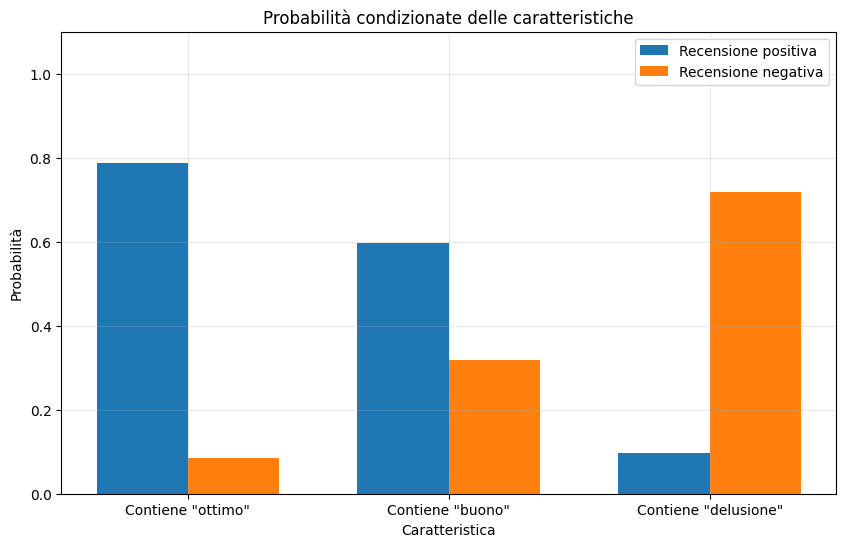

In [ ]:
# Visualizziamo con un grafico
plt.figure(figsize=(10, 6))
x = np.arange(len(prob_condizionate['Caratteristica']))
width = 0.35

plt.bar(x - width/2, prob_condizionate['P(caratteristica|positiva)'], width, label='Recensione positiva')
plt.bar(x + width/2, prob_condizionate['P(caratteristica|negativa)'], width, label='Recensione negativa')

plt.xlabel('Caratteristica')
plt.ylabel('Probabilità')
plt.title('Probabilità condizionate delle caratteristiche')
plt.xticks(x, prob_condizionate['Caratteristica'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

plt.show()

### 2.4 Applicazione del Teorema di Bayes per Classificare una Recensione

Ora utilizziamo il teorema di Bayes per classificare una recensione con specifiche caratteristiche:


In [ ]:
def calcola_probabilita_bayes(caratteristiche, probabilita_condizionate, p_priori):
    """
    Calcola la probabilità di recensione positiva dato un insieme di caratteristiche usando il teorema di Bayes.
    
    Parametri:
    caratteristiche -- dizionario con le caratteristiche e il loro valore (True/False)
    probabilita_condizionate -- dataframe con le probabilità condizionate
    p_priori -- probabilità a priori della recensione positiva
    
    Returns:
    p_positiva_dato_caratteristiche -- probabilità a posteriori della recensione positiva
    p_negativa_dato_caratteristiche -- probabilità a posteriori della recensione negativa
    """
    # Probabilità a priori
    p_positiva = p_priori
    p_negativa = 1 - p_priori
    
    # Calcoliamo P(caratteristiche|positiva) e P(caratteristiche|negativa)
    p_caratteristiche_dato_positiva = 1.0
    p_caratteristiche_dato_negativa = 1.0
    
    for caratteristica, presente in caratteristiche.items():
        idx = probabilita_condizionate[probabilita_condizionate['Caratteristica'] == caratteristica].index[0]
        
        if presente:
            # Se la caratteristica è presente, usiamo P(caratteristica|positiva)
            p_caratteristiche_dato_positiva *= probabilita_condizionate.loc[idx, 'P(caratteristica|positiva)']
            p_caratteristiche_dato_negativa *= probabilita_condizionate.loc[idx, 'P(caratteristica|negativa)']
        else:
            # Se la caratteristica non è presente, usiamo 1 - P(caratteristica|positiva)
            p_caratteristiche_dato_positiva *= (1 - probabilita_condizionate.loc[idx, 'P(caratteristica|positiva)'])
            p_caratteristiche_dato_negativa *= (1 - probabilita_condizionate.loc[idx, 'P(caratteristica|negativa)'])
    
    # Calcoliamo P(caratteristiche) usando il teorema della probabilità totale
    p_caratteristiche = p_caratteristiche_dato_positiva * p_positiva + p_caratteristiche_dato_negativa * p_negativa
    
    # Applichiamo il teorema di Bayes
    p_positiva_dato_caratteristiche = (p_caratteristiche_dato_positiva * p_positiva) / p_caratteristiche
    p_negativa_dato_caratteristiche = (p_caratteristiche_dato_negativa * p_negativa) / p_caratteristiche
    
    return p_positiva_dato_caratteristiche, p_negativa_dato_caratteristiche

In [ ]:
# Caso 1: Recensione con "ottimo" e "buono", senza "delusione"
caratteristiche_recensione1 = {'Contiene "ottimo"': True, 'Contiene "buono"': True, 'Contiene "delusione"': False}
p_positiva_dato_car1, p_negativa_dato_car1 = calcola_probabilita_bayes(
    caratteristiche_recensione1, prob_condizionate, p_positiva
)

print("\nCaso 1: Recensione con 'ottimo' e 'buono', senza 'delusione'")
print(f"Probabilità di recensione positiva: {p_positiva_dato_car1:.4f}")
print(f"Probabilità di recensione negativa: {p_negativa_dato_car1:.4f}")
print(f"Classificazione: {'Positiva' if p_positiva_dato_car1 > p_negativa_dato_car1 else 'Negativa'}")



Caso 1: Recensione con 'ottimo' e 'buono', senza 'delusione'
Probabilità di recensione positiva: 0.9888
Probabilità di recensione negativa: 0.0112
Classificazione: Positiva


In [ ]:
# Caso 2: Recensione senza parole positive ma con "delusione"
caratteristiche_recensione2 = {'Contiene "ottimo"': False, 'Contiene "buono"': False, 'Contiene "delusione"': True}
p_positiva_dato_car2, p_negativa_dato_car2 = calcola_probabilita_bayes(
    caratteristiche_recensione2, prob_condizionate, p_positiva
)

print("\nCaso 2: Recensione senza parole positive ma con 'delusione'")
print(f"Probabilità di recensione positiva: {p_positiva_dato_car2:.4f}")
print(f"Probabilità di recensione negativa: {p_negativa_dato_car2:.4f}")
print(f"Classificazione: {'Positiva' if p_positiva_dato_car2 > p_negativa_dato_car2 else 'Negativa'}")



Caso 2: Recensione senza parole positive ma con 'delusione'
Probabilità di recensione positiva: 0.0287
Probabilità di recensione negativa: 0.9713
Classificazione: Negativa


In [ ]:
# Caso 3: Recensione con una combinazione mista di parole
caratteristiche_recensione3 = {'Contiene "ottimo"': False, 'Contiene "buono"': True, 'Contiene "delusione"': True}
p_positiva_dato_car3, p_negativa_dato_car3 = calcola_probabilita_bayes(
    caratteristiche_recensione3, prob_condizionate, p_positiva
)

print("\nCaso 3: Recensione con una combinazione mista di parole")
print(f"Probabilità di recensione positiva: {p_positiva_dato_car3:.4f}")
print(f"Probabilità di recensione negativa: {p_negativa_dato_car3:.4f}")
print(f"Classificazione: {'Positiva' if p_positiva_dato_car3 > p_negativa_dato_car3 else 'Negativa'}")



Caso 3: Recensione con una combinazione mista di parole
Probabilità di recensione positiva: 0.0859
Probabilità di recensione negativa: 0.9141
Classificazione: Negativa


### 2.5 Difficoltà con la Regola della Catena

Nella nostra implementazione precedente, abbiamo calcolato $P(q|y=l)$ direttamente moltiplicando le probabilità condizionate di ogni caratteristica. Questo funziona perché abbiamo fatto un'assunzione di indipendenza.

In generale, per calcolare la probabilità congiunta di più feature, dovremmo usare la regola della catena:

$$P(q) = P(q_1, ..., q_D) = P(q_1) \times P(q_2|q_1) \times ... \times P(q_D|q_{D-1}, ..., q_2, q_1)$$

E nel nostro caso:

$$P(q|y=l) = P(q_1|y=l) \times P(q_2|q_1, y=l) \times ... \times P(q_D|q_{D-1}, ..., q_2, q_1, y=l)$$

Il problema è che questa formula richiede di calcolare molte probabilità condizionate complesse, che potrebbero non essere disponibili nei nostri dati o potrebbero richiedere troppi dati per essere stimate accuratamente. Questo è noto come "problema della frammentazione dei dati" o "curse of dimensionality".

1. Problema della dimensionalità
Un classificatore bayesiano completo richiede di stimare la probabilità congiunta di tutte le caratteristiche dato un valore della classe:
P(x1,x2,...,xn∣y)P(x_1, x_2, ..., x_n | y)P(x1​,x2​,...,xn​∣y)
Senza l'assunzione di indipendenza, questo diventa estremamente problematico:

Con solo 10 caratteristiche binarie, abbiamo 210=1.0242^{10} = 1.024
210=1.024 combinazioni possibili


Con 20 caratteristiche, arriviamo a 220=1.048.5762^{20} = 1.048.576
220=1.048.576 combinazioni

Per ogni classe!

2. Necessità di dati enormi
Per stimare in modo affidabile tutte queste probabilità congiunte, avremmo bisogno di:


Un dataset gigantesco che copra tutte (o la maggior parte) delle possibili combinazioni
Molti esempi per ogni combinazione per ottenere stime statisticamente significative


Nella pratica, anche con grandi dataset, molte combinazioni di caratteristiche non avranno esempi sufficienti o non compariranno affatto.
3. Complessità computazionale

Un modello bayesiano completo richiede:

Memorizzazione di un numero esponenziale di parametri

Tempi di addestramento molto più lunghi

Maggiore complessità di implementazione

# 3. Naive Bayes: Assunzione di Indipendenza Condizionale

## 3.1 L'Assunzione "Naive" di Indipendenza Condizionale

Il Naive Bayes è chiamato "naive" (ingenuo) perché fa un'assunzione semplificativa ma potente: assume che tutte le caratteristiche (feature) siano condizionalmente indipendenti tra loro dato il valore della classe target.

### Indipendenza tra Eventi

Due eventi $X$ e $Y$ si dicono indipendenti se:

$$P(X|Y) = P(X)$$

In altre parole, conoscere $Y$ non fornisce alcuna informazione su $X$. Per eventi indipendenti vale anche:

$$P(X, Y) = P(X) \times P(Y)$$

### Indipendenza Condizionale

L'indipendenza condizionale è una forma più debole di indipendenza. Due eventi $X$ e $Y$ sono condizionalmente indipendenti dato un terzo evento $Z$ se:

$$P(X|Y, Z) = P(X|Z)$$

Ovvero, una volta noto $Z$, conoscere $Y$ non fornisce ulteriori informazioni su $X$. Vale anche:

$$P(X, Y|Z) = P(X|Z) \times P(Y|Z)$$

### L'Assunzione Naive Bayes

Nel classificatore Naive Bayes, assumiamo che tutte le feature $q_1, q_2, ..., q_D$ siano condizionalmente indipendenti dato il valore della classe $y = l$:

$$P(q|y=l) = P(q_1|y=l) \times P(q_2|y=l) \times ... \times P(q_D|y=l) = \prod_{d=1}^{D} P(q_d|y=l)$$

Questa assunzione semplifica enormemente il calcolo della probabilità congiunta, permettendoci di evitare il "curse of dimensionality".


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

## 3.2 Verifica dell'Indipendenza Condizionale

Verifichiamo se l'assunzione di indipendenza condizionale è valida per un dataset di recensioni di film:


In [ ]:
# Creiamo un dataset sintetico più complesso per le recensioni di film
n_samples = 1000
np.random.seed(42)

# Probabilità base per recensione positiva
p_positiva = 0.6

# Generiamo le etichette delle recensioni
recensione_positiva = np.random.choice([True, False], size=n_samples, p=[p_positiva, 1-p_positiva])


In [ ]:
# Generiamo le caratteristiche con probabilità condizionate diverse per recensioni positive e negative
def genera_caratteristica(recensione_positiva, p_dato_positiva, p_dato_negativa):
    probs = np.where(recensione_positiva, p_dato_positiva, p_dato_negativa)
    return np.random.random(n_samples) < probs

# Caratteristiche indipendenti condizionalmente
contiene_ottimo = genera_caratteristica(recensione_positiva, 0.8, 0.1)
contiene_buono = genera_caratteristica(recensione_positiva, 0.6, 0.3)

# Caratteristica NON indipendente condizionalmente (dipende da "ottimo")
# Una recensione che contiene "ottimo" ha più probabilità di contenere "fantastico"
p_fantastico_dato_ottimo_positiva = 0.9      # P(fantastico|ottimo, positiva)
p_fantastico_dato_non_ottimo_positiva = 0.4   # P(fantastico|non ottimo, positiva)
p_fantastico_dato_ottimo_negativa = 0.7   # P(fantastico|ottimo, negativa)
p_fantastico_dato_non_ottimo_negativa = 0.05 # P(fantastico|non ottimo, negativa)

In [ ]:
# Generiamo "fantastico" in base a "ottimo" e "recensione_positiva"
contiene_fantastico = np.zeros(n_samples, dtype=bool)
for i in range(n_samples):
    if recensione_positiva[i] and contiene_ottimo[i]:
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_ottimo_positiva
    elif recensione_positiva[i] and not contiene_ottimo[i]:
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_non_ottimo_positiva
    elif not recensione_positiva[i] and contiene_ottimo[i]:
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_ottimo_negativa
    else:  # not recensione_positiva[i] and not contiene_ottimo[i]
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_non_ottimo_negativa

# Creiamo il dataframe
df_recensioni = pd.DataFrame({
    'contiene_ottimo': contiene_ottimo,
    'contiene_buono': contiene_buono,
    'contiene_fantastico': contiene_fantastico,
    'recensione_positiva': recensione_positiva
})

In [ ]:
# Verifichiamo se buono e ottimo sono condizionalmente indipendenti dato recensione_positiva
print("Verifica di indipendenza condizionale tra 'buono' e 'ottimo' dato recensione_positiva:")
print("\nVerifica di indipendenza condizionale tra 'fantastico' e 'ottimo' dato recensione_positiva:")
print("\nPer recensioni POSITIVE:")
print(f"P(fantastico|positiva) = {df_recensioni[df_recensioni['recensione_positiva']]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|ottimo, positiva) = {df_recensioni[(df_recensioni['recensione_positiva']) & (df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|non ottimo, positiva) = {df_recensioni[(df_recensioni['recensione_positiva']) & (~df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")

print("\nPer recensioni NEGATIVE:")
print(f"P(fantastico|negativa) = {df_recensioni[~df_recensioni['recensione_positiva']]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|ottimo, negativa) = {df_recensioni[(~df_recensioni['recensione_positiva']) & (df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|non ottimo, negativa) = {df_recensioni[(~df_recensioni['recensione_positiva']) & (~df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")

Verifica di indipendenza condizionale tra 'buono' e 'ottimo' dato recensione_positiva:

Verifica di indipendenza condizionale tra 'fantastico' e 'ottimo' dato recensione_positiva:

Per recensioni POSITIVE:
P(fantastico|positiva) = 0.7993
P(fantastico|ottimo, positiva) = 0.9172
P(fantastico|non ottimo, positiva) = 0.3615

Per recensioni NEGATIVE:
P(fantastico|negativa) = 0.1111
P(fantastico|ottimo, negativa) = 0.7273
P(fantastico|non ottimo, negativa) = 0.0537


I risultati mostrano che:
- 'buono' e 'ottimo' sembrano essere quasi condizionalmente indipendenti dato il valore di 'recensione_positiva'
- 'fantastico' e 'ottimo' NON sono condizionalmente indipendenti, poiché abbiamo costruito il dataset in modo che ci sia una dipendenza

## 3.3 Implementazione dell'Algoritmo Naive Bayes

Ora implementiamo l'algoritmo Naive Bayes da zero per la classificazione di testi basandoci sull'assunzione di indipendenza condizionale:


In [ ]:
# Funzione per evitare underflow nelle operazioni con logaritmi
def logsumexp(a):
    """
    Calcola log(sum(exp(a))) in modo numericalmente stabile.
    """
    a_max = np.max(a)
    return a_max + np.log(np.sum(np.exp(a - a_max)))

class NaiveBayes:
    """
    Implementazione dell'algoritmo Naive Bayes per classificazione.
    
    Parametri:
    ----------
    smoothing : float, default=1.0
        Parametro di smoothing per evitare probabilità zero (smoothing di Laplace).
    """
    
    def __init__(self, smoothing=1.0):
        self.smoothing = smoothing
        self.class_priors = {}  # Probabilità a priori delle classi
        self.feature_probs = {}  # Probabilità condizionate delle feature dato la classe
        self.classes = None
        self.features = None
    
    def fit(self, X, y):
        """
        Addestra il classificatore Naive Bayes.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature.
        y : array-like, shape (n_samples,)
            Vettore delle classi.
        
        Returns:
        --------
        self : object
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.features = np.arange(n_features)
        
        # Calcolo delle probabilità a priori delle classi
        for c in self.classes:
            self.class_priors[c] = np.mean(y == c)
        
        # Calcolo delle probabilità condizionate delle feature
        for c in self.classes:
            self.feature_probs[c] = {}
            X_c = X[y == c]
            
            for feature_idx in self.features:
                # Calcolo con smoothing di Laplace
                feature_values = X_c[:, feature_idx]
                count = np.sum(feature_values) + self.smoothing
                total = len(feature_values) + 2 * self.smoothing  # +2 per True e False
                
                self.feature_probs[c][feature_idx] = count / total
        
        return self
    
    def predict_proba(self, X):
        """
        Restituisce le probabilità delle classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature. Può essere un array NumPy o una lista di liste.
        
        Returns:
        --------
        array, shape (n_samples, n_classes) : Le probabilità di ogni classe per ogni campione.
        """
        # Convertiamo X in un array NumPy se non lo è già
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        probas = np.zeros((n_samples, n_classes))
        
        for i, sample in enumerate(X):
            for j, c in enumerate(self.classes):
                # Probabilità a priori
                proba = np.log(self.class_priors[c])
                
                # Prodotto delle probabilità condizionate (in log-spazio per evitare underflow)
                for feature_idx in self.features:
                    feature_value = sample[feature_idx]
                    feature_prob = self.feature_probs[c][feature_idx]
                    
                    if feature_value:
                        proba += np.log(feature_prob)
                    else:
                        proba += np.log(1 - feature_prob)
                
                probas[i, j] = proba
        
        # Convertiamo da log-spazio a probabilità normalizzate
        log_prob_sum = np.array([logsumexp(probas[i]) for i in range(n_samples)])
        probas = np.exp(probas - log_prob_sum.reshape(-1, 1))
        
        return probas
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature. Può essere un array NumPy o una lista di liste.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        # Convertiamo X in un array NumPy se non lo è già
        X = np.array(X)
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature di test.
        y : array-like, shape (n_samples,)
            Classi vere dei campioni di test.
        
        Returns:
        --------
        float : Accuratezza del classificatore.
        """
        return np.mean(self.predict(X) == y)


## 3.4 Test del Classificatore Naive Bayes

Testiamo il nostro classificatore sul dataset delle recensioni:

In [ ]:
# Prepariamo il dataset
X = df_recensioni[['contiene_ottimo', 'contiene_buono', 'contiene_fantastico']].values
y = df_recensioni['recensione_positiva'].values

# Dividiamo in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestriamo il modello
nb = NaiveBayes(smoothing=1.0)
nb.fit(X_train, y_train)

# Valutiamo il modello
accuracy = nb.score(X_test, y_test)
print(f"\nAccuratezza del modello: {accuracy:.4f}")

# Verifichiamo le probabilità apprese
print("\nProbabilità a priori:")
for c in nb.classes:
    print(f"P(classe={c}) = {nb.class_priors[c]:.4f}")

print("\nProbabilità condizionate:")
feature_names = ['contiene_ottimo', 'contiene_buono', 'contiene_fantastico']
for c in nb.classes:
    print(f"Per classe={c}:")
    for feature_idx, feature_name in enumerate(feature_names):
        print(f"  P({feature_name}|classe={c}) = {nb.feature_probs[c][feature_idx]:.4f}")

# Facciamo alcune predizioni di esempio
print("\nPredizioni di esempio:")
examples = [
    [True, True, True],    # ottimo, buono, fantastico
    [False, False, False], # nessuna parola positiva
    [True, False, False],  # solo ottimo
    [False, True, False],  # solo buono
    [False, False, True]   # solo fantastico
]

example_names = [
    "Recensione con 'ottimo', 'buono' e 'fantastico'",
    "Recensione senza parole positive",
    "Recensione con solo 'ottimo'",
    "Recensione con solo 'buono'",
    "Recensione con solo 'fantastico'"
]

for i, example in enumerate(examples):
    proba = nb.predict_proba([example])[0]
    predicted_class = nb.predict([example])[0]
    print(f"{example_names[i]}:")
    print(f"  P(positiva|recensione) = {proba[1]:.4f}")
    print(f"  P(negativa|recensione) = {proba[0]:.4f}")
    print(f"  Classificazione: {'Positiva' if predicted_class else 'Negativa'}")


Accuratezza del modello: 0.8800

Probabilità a priori:
P(classe=False) = 0.3937
P(classe=True) = 0.6062

Probabilità condizionate:
Per classe=False:
  P(contiene_ottimo|classe=False) = 0.0883
  P(contiene_buono|classe=False) = 0.3155
  P(contiene_fantastico|classe=False) = 0.1136
Per classe=True:
  P(contiene_ottimo|classe=True) = 0.7741
  P(contiene_buono|classe=True) = 0.5893
  P(contiene_fantastico|classe=True) = 0.8029

Predizioni di esempio:
Recensione con 'ottimo', 'buono' e 'fantastico':
  P(positiva|recensione) = 0.9944
  P(negativa|recensione) = 0.0056
  Classificazione: Positiva
Recensione senza parole positive:
  P(positiva|recensione) = 0.0484
  P(negativa|recensione) = 0.9516
  Classificazione: Negativa
Recensione con solo 'ottimo':
  P(positiva|recensione) = 0.6429
  P(negativa|recensione) = 0.3571
  Classificazione: Positiva
Recensione con solo 'buono':
  P(positiva|recensione) = 0.1368
  P(negativa|recensione) = 0.8632
  Classificazione: Negativa
Recensione con solo 'f

## 3.5 Vantaggi dell'Assunzione di Indipendenza

Nonostante l'assunzione di indipendenza condizionale sia spesso violata nella pratica, il Naive Bayes funziona sorprendentemente bene in molti contesti. Ecco perché:

1. **Riduzione della complessità**: Riduce drasticamente il numero di parametri da stimare.
   - Con indipendenza: $O(n \times k)$ parametri, dove $n$ è il numero di feature e $k$ è il numero di classi.
   - Senza indipendenza: $O(2^n \times k)$ parametri.

2. **Robustezza alla frammentazione dei dati**: Evita il problema della frammentazione dei dati che si verifica quando si cercano di stimare probabilità congiunte per combinazioni specifiche di feature.

3. **Buon funzionamento con dati limitati**: Anche con set di dati relativamente piccoli, è possibile ottenere stime ragionevoli dei parametri.

4. **Resistenza al rumore**: Sebbene le stime individuali delle probabilità condizionate possano essere imprecise, gli errori tendono spesso a bilanciarsi quando si calcola il prodotto.

5. **Efficienza computazionale**: È molto veloce sia nell'addestramento che nella predizione.

Il classificatore Naive Bayes è particolarmente adatto per:
- Classificazione di testi e documenti
- Filtri anti-spam
- Analisi del sentimento
- Sistemi di raccomandazione semplici
- Diagnosi mediche

# 5. Naive Bayes per Caratteristiche Continue

Finora abbiamo visto come il Naive Bayes gestisce caratteristiche categoriche o binarie. In questa sezione esploreremo come estendere l'algoritmo per gestire caratteristiche continue.

## 5.1 Il Problema delle Caratteristiche Continue

Quando abbiamo a che fare con caratteristiche continue, non possiamo calcolare direttamente le probabilità condizionate come abbiamo fatto per le caratteristiche categoriche. Una caratteristica continua può assumere un'infinità di valori, quindi la probabilità di un valore specifico sarebbe praticamente zero.

Come affrontato nelle slide, ci sono due approcci principali:

1. **Distribuzione di probabilità**: Modellare le caratteristiche continue usando distribuzioni di probabilità (come la distribuzione Normale/Gaussiana)
2. **Discretizzazione (binning)**: Convertire le caratteristiche continue in categoriche dividendole in intervalli (bin)

Implementiamo entrambi gli approcci.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from scipy import stats

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

## 5.2 Creazione di un Dataset con Caratteristiche Continue

Creiamo un dataset sintetico con caratteristiche continue per la classificazione del rendimento degli studenti:


In [ ]:
# Generiamo un dataset di rendimento degli studenti
n_samples = 1000
np.random.seed(42)

# Creiamo le etichette delle classi (successo/insuccesso)
successo = np.random.choice([True, False], size=n_samples, p=[0.7, 0.3])
def genera_caratteristica_continua(successo, media_successo, std_successo, media_insuccesso, std_insuccesso):
    """Genera una caratteristica continua con distribuzioni gaussiane diverse per le due classi."""
    valori = np.zeros(len(successo))
    valori[successo] = np.random.normal(media_successo, std_successo, np.sum(successo))
    valori[~successo] = np.random.normal(media_insuccesso, std_insuccesso, np.sum(~successo))
    return valori

In [ ]:
# Ore di studio settimanali
ore_studio = genera_caratteristica_continua(successo, 25, 5, 15, 7)

# Media precedente
media_precedente = genera_caratteristica_continua(successo, 7.5, 1.0, 6.0, 1.5)

# Qualità del sonno (ore)
qualita_sonno = genera_caratteristica_continua(successo, 7.5, 1.0, 6.0, 2.0)

# Creiamo il dataframe
df_studenti = pd.DataFrame({
    'ore_studio': ore_studio,
    'media_precedente': media_precedente,
    'qualita_sonno': qualita_sonno,
    'successo': successo
})
# Visualizziamo le prime righe del dataset
print("Dataset di rendimento degli studenti (prime 10 righe):")
print(df_studenti.head(10))

Dataset di rendimento degli studenti (prime 10 righe):
   ore_studio  media_precedente  qualita_sonno  successo
0   24.248398          7.779084       6.267460      True
1   10.874674          5.431860       7.915988     False
2   11.789530          9.123990       7.327091     False
3   23.366519          7.791564       6.815508      True
4   19.787112          5.809328       7.957324      True
5   19.138831          6.521500       9.598221      True
6   27.321849         10.255218       7.361918      True
7   20.996917          6.646294       3.947838     False
8   22.247240          7.194389       8.091136      True
9   26.741640          4.086476       6.762851     False


### Visualizzazione delle distribuzioni delle caratteristiche continue

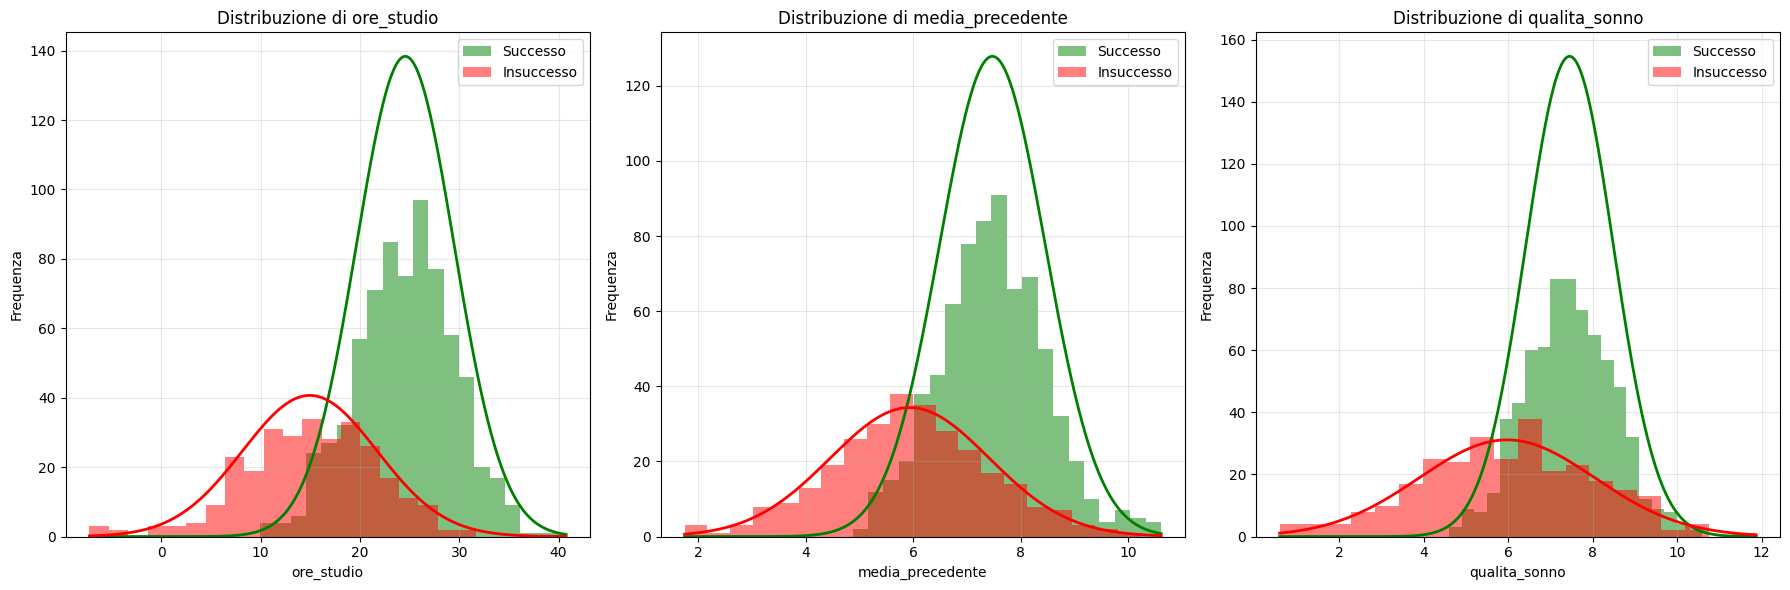

In [ ]:
# Crea una figura con 3 subplot (una per ogni caratteristica)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Aggiungiamo i grafici di distribuzione per ogni caratteristica
for i, feature in enumerate(['ore_studio', 'media_precedente', 'qualita_sonno']):
    # Dati per gli studenti con successo
    data_success = df_studenti[df_studenti['successo']][feature]
    # Dati per gli studenti senza successo
    data_failure = df_studenti[~df_studenti['successo']][feature]
    
    # Creiamo gli istogrammi sovrapposti
    axes[i].hist(data_success, bins=20, alpha=0.5, label='Successo', color='green')
    axes[i].hist(data_failure, bins=20, alpha=0.5, label='Insuccesso', color='red')
    
    # Calcoliamo e visualizziamo le curve di distribuzione normale
    x = np.linspace(df_studenti[feature].min(), df_studenti[feature].max(), 1000)
    
    # Distribuzione per gli studenti con successo
    mean_success = data_success.mean()
    std_success = data_success.std()
    pdf_success = stats.norm.pdf(x, mean_success, std_success) * len(data_success) * (df_studenti[feature].max() - df_studenti[feature].min()) / 20
    
    # Distribuzione per gli studenti senza successo
    mean_failure = data_failure.mean()
    std_failure = data_failure.std()
    pdf_failure = stats.norm.pdf(x, mean_failure, std_failure) * len(data_failure) * (df_studenti[feature].max() - df_studenti[feature].min()) / 20
    
    axes[i].plot(x, pdf_success, 'g-', linewidth=2)
    axes[i].plot(x, pdf_failure, 'r-', linewidth=2)
    
    # Aggiungiamo titolo e legende
    axes[i].set_title(f'Distribuzione di {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequenza')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Mostriamo le statistiche per ogni feature e classe
print("\nStatistiche delle caratteristiche per classe:")
for feature in ['ore_studio', 'media_precedente', 'qualita_sonno']:
    print(f"\nCaratteristica: {feature}")
    print("Per studenti con successo:")
    print(df_studenti[df_studenti['successo']][feature].describe())
    print("\nPer studenti senza successo:")
    print(df_studenti[~df_studenti['successo']][feature].describe())


Statistiche delle caratteristiche per classe:

Caratteristica: ore_studio
Per studenti con successo:
count    712.000000
mean      24.567587
std        4.927641
min        9.961838
25%       21.322033
50%       24.707668
75%       27.773129
max       40.760284
Name: ore_studio, dtype: float64

Per studenti senza successo:
count    288.000000
mean      14.951878
std        6.779673
min       -7.236927
25%       10.797631
50%       15.102663
75%       19.811683
max       31.718604
Name: ore_studio, dtype: float64

Caratteristica: media_precedente
Per studenti con successo:
count    712.000000
mean       7.475005
std        0.984539
min        4.875183
25%        6.815762
50%        7.461758
75%        8.128818
max       10.612910
Name: media_precedente, dtype: float64

Per studenti senza successo:
count    288.000000
mean       5.937986
std        1.482553
min        1.750455
25%        5.030739
50%        5.926680
75%        6.924303
max       10.236496
Name: media_precedente, dtype: f

## 5.3 Approccio 1: Distribuzione Gaussiana

Nel Naive Bayes Gaussiano, assumiamo che i valori di ogni caratteristica seguano una distribuzione normale (gaussiana) per ogni classe. Dobbiamo quindi:

1. Calcolare media e deviazione standard di ogni caratteristica per ogni classe
2. Usare la funzione di densità di probabilità (PDF) della distribuzione normale per calcolare la probabilità di un valore

$$P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

dove:
- $x_i$ è il valore della caratteristica
- $\mu_y$ è la media della caratteristica per la classe $y$
- $\sigma^2_y$ è la varianza della caratteristica per la classe $y$

In [ ]:
class GaussianNaiveBayes:
    """
    Implementazione del Naive Bayes Gaussiano per caratteristiche continue.
    """
    
    def __init__(self):
        self.class_priors = {}  # Probabilità a priori delle classi
        self.means = {}         # Media per ogni feature per ogni classe
        self.variances = {}     # Varianza per ogni feature per ogni classe
        self.classes = None     # Classi possibili
        self.features = None    # Caratteristiche disponibili
    
    def fit(self, X, y):
        """
        Addestra il classificatore Naive Bayes Gaussiano.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue.
        y : Series o array-like
            Vettore delle classi.
        
        Returns:
        --------
        self : object
        """
        # Convertiamo in DataFrame per maggiore flessibilità
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        if not isinstance(y, pd.Series):
            y = pd.Series(y)
        
        self.classes = np.unique(y)
        self.features = X.columns if hasattr(X, 'columns') else range(X.shape[1])
        
        # Calcolo delle probabilità a priori delle classi
        for c in self.classes:
            self.class_priors[c] = np.mean(y == c)
            self.means[c] = {}
            self.variances[c] = {}
            
            # Calcolo media e varianza per ogni feature per questa classe
            X_c = X[y == c]
            for feature in self.features:
                self.means[c][feature] = X_c[feature].mean()
                # Aggiungiamo un piccolo epsilon per evitare varianze zero
                self.variances[c][feature] = X_c[feature].var() + 1e-9
        
        return self
    
    def _calculate_gaussian_probability(self, x, mean, variance):
        """
        Calcola la probabilità di x dato la distribuzione gaussiana con media e varianza specificate.
        
        Parametri:
        ----------
        x : float
            Valore di cui calcolare la probabilità.
        mean : float
            Media della distribuzione gaussiana.
        variance : float
            Varianza della distribuzione gaussiana.
        
        Returns:
        --------
        float : Probabilità calcolata.
        """
        exponent = np.exp(-(x - mean) ** 2 / (2 * variance))
        return exponent / np.sqrt(2 * np.pi * variance)
    
    def predict_proba(self, X):
        """
        Restituisce le probabilità delle classi per i campioni in X.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples, n_classes) : Le probabilità di ogni classe per ogni campione.
        """
        # Convertiamo in DataFrame per maggiore flessibilità
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.features)
        
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        probas = np.zeros((n_samples, n_classes))
        
        for i, sample in X.iterrows():
            for j, c in enumerate(self.classes):
                # Probabilità a priori (in log-spazio per evitare underflow)
                log_prob = np.log(self.class_priors[c])
                
                # Prodotto delle probabilità condizionate per ogni feature
                for feature in self.features:
                    x_value = sample[feature]
                    mean = self.means[c][feature]
                    variance = self.variances[c][feature]
                    
                    # Calcoliamo la probabilità gaussiana
                    gaussian_prob = self._calculate_gaussian_probability(x_value, mean, variance)
                    
                    # Sommiamo i logaritmi
                    log_prob += np.log(gaussian_prob)
                
                probas[i % n_samples, j] = log_prob
        
        # Convertiamo da log-spazio a probabilità normalizzate
        log_prob_sum = np.array([self._logsumexp(probas[i % n_samples]) for i in range(n_samples)])
        probas = np.exp(probas - log_prob_sum.reshape(-1, 1))
        
        return probas
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue di test.
        y : Series o array-like
            Classi vere dei campioni di test.
        
        Returns:
        --------
        float : Accuratezza del classificatore.
        """
        return np.mean(self.predict(X) == y)
    
    def _logsumexp(self, a):
        """
        Calcola log(sum(exp(a))) in modo numericamente stabile.
        """
        a_max = np.max(a)
        return a_max + np.log(np.sum(np.exp(a - a_max)))


Accuratezza del Naive Bayes Gaussiano: 0.5267

Parametri appresi dal modello:

Medie:

Classe: False (Successo = False)
  Media di ore_studio: 14.5168
  Media di media_precedente: 5.9438
  Media di qualita_sonno: 5.9628

Classe: True (Successo = True)
  Media di ore_studio: 24.3567
  Media di media_precedente: 7.4607
  Media di qualita_sonno: 7.4365

Varianze:

Classe: False (Successo = False)
  Varianza di ore_studio: 47.0745
  Varianza di media_precedente: 2.0353
  Varianza di qualita_sonno: 4.1366

Classe: True (Successo = True)
  Varianza di ore_studio: 24.5110
  Varianza di media_precedente: 0.9821
  Varianza di qualita_sonno: 1.0797


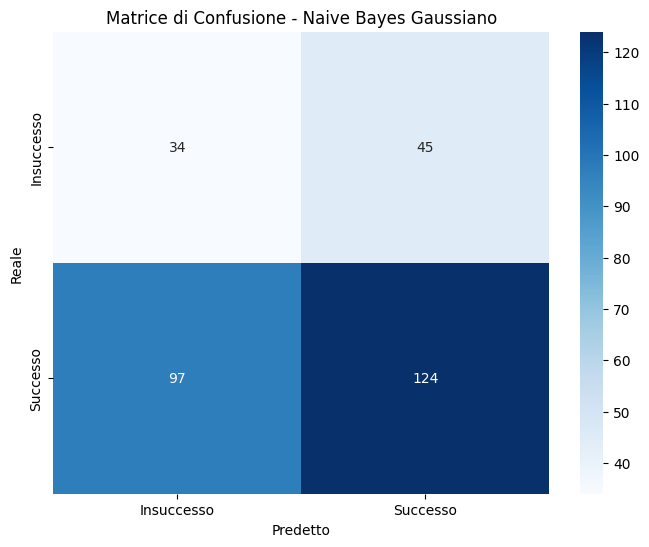


Classification Report:
              precision    recall  f1-score   support

  Insuccesso       0.26      0.43      0.32        79
    Successo       0.73      0.56      0.64       221

    accuracy                           0.53       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.61      0.53      0.55       300



In [ ]:
# Dividiamo il dataset in training e test
X = df_studenti[['ore_studio', 'media_precedente', 'qualita_sonno']]
y = df_studenti['successo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestriamo il modello Naive Bayes Gaussiano
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Valutiamo il modello
accuracy = gnb.score(X_test, y_test)
print(f"\nAccuratezza del Naive Bayes Gaussiano: {accuracy:.4f}")

# Mostriamo le medie e varianze apprese
print("\nParametri appresi dal modello:")
print("\nMedie:")
for c in gnb.classes:
    print(f"\nClasse: {c} (Successo = {c})")
    for feature in gnb.features:
        print(f"  Media di {feature}: {gnb.means[c][feature]:.4f}")

print("\nVarianze:")
for c in gnb.classes:
    print(f"\nClasse: {c} (Successo = {c})")
    for feature in gnb.features:
        print(f"  Varianza di {feature}: {gnb.variances[c][feature]:.4f}")

# Calcoliamo la matrice di confusione
y_pred = gnb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Insuccesso', 'Successo'],
            yticklabels=['Insuccesso', 'Successo'])
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Matrice di Confusione - Naive Bayes Gaussiano')
plt.show()

# Mostriamo il classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Insuccesso', 'Successo']))

## 5.4 Approccio 2: Discretizzazione (Binning)

Un'alternativa all'uso di distribuzioni di probabilità è la discretizzazione (binning), che converte le caratteristiche continue in categoriche dividendole in intervalli (bin).

Ci sono due approcci principali:
1. **Equal-width binning**: Divide il range in intervalli di uguale ampiezza
2. **Equal-frequency binning**: Assegna lo stesso numero di istanze a ogni bin

Implementiamo entrambi gli approcci:

In [ ]:
def equal_width_binning(data, n_bins=5):
    """
    Discretizza i dati usando il metodo equal-width binning.
    
    Parametri:
    ----------
    data : array-like
        Dati da discretizzare.
    n_bins : int, default=5
        Numero di bin da creare.
    
    Returns:
    --------
    bins : array
        Array con i valori discretizzati (indici dei bin).
    bin_edges : array
        Array con i bordi dei bin.
    """
    # Calcoliamo i bordi dei bin
    min_val = np.min(data)
    max_val = np.max(data)
    bin_edges = np.linspace(min_val, max_val, n_bins + 1)
    
    # Assegniamo ogni valore al bin corrispondente
    bins = np.digitize(data, bin_edges[1:-1])
    
    return bins, bin_edges

def equal_frequency_binning(data, n_bins=5):
    """
    Discretizza i dati usando il metodo equal-frequency binning.
    
    Parametri:
    ----------
    data : array-like
        Dati da discretizzare.
    n_bins : int, default=5
        Numero di bin da creare.
    
    Returns:
    --------
    bins : array
        Array con i valori discretizzati (indici dei bin).
    bin_edges : array
        Array con i bordi dei bin.
    """
    # Calcoliamo i quantili
    quantiles = np.linspace(0, 100, n_bins + 1)
    bin_edges = np.percentile(data, quantiles)
    
    # Assegniamo ogni valore al bin corrispondente
    bins = np.digitize(data, bin_edges[1:-1])
    
    return bins, bin_edges

### Visualizzazione dei risultati del Binning

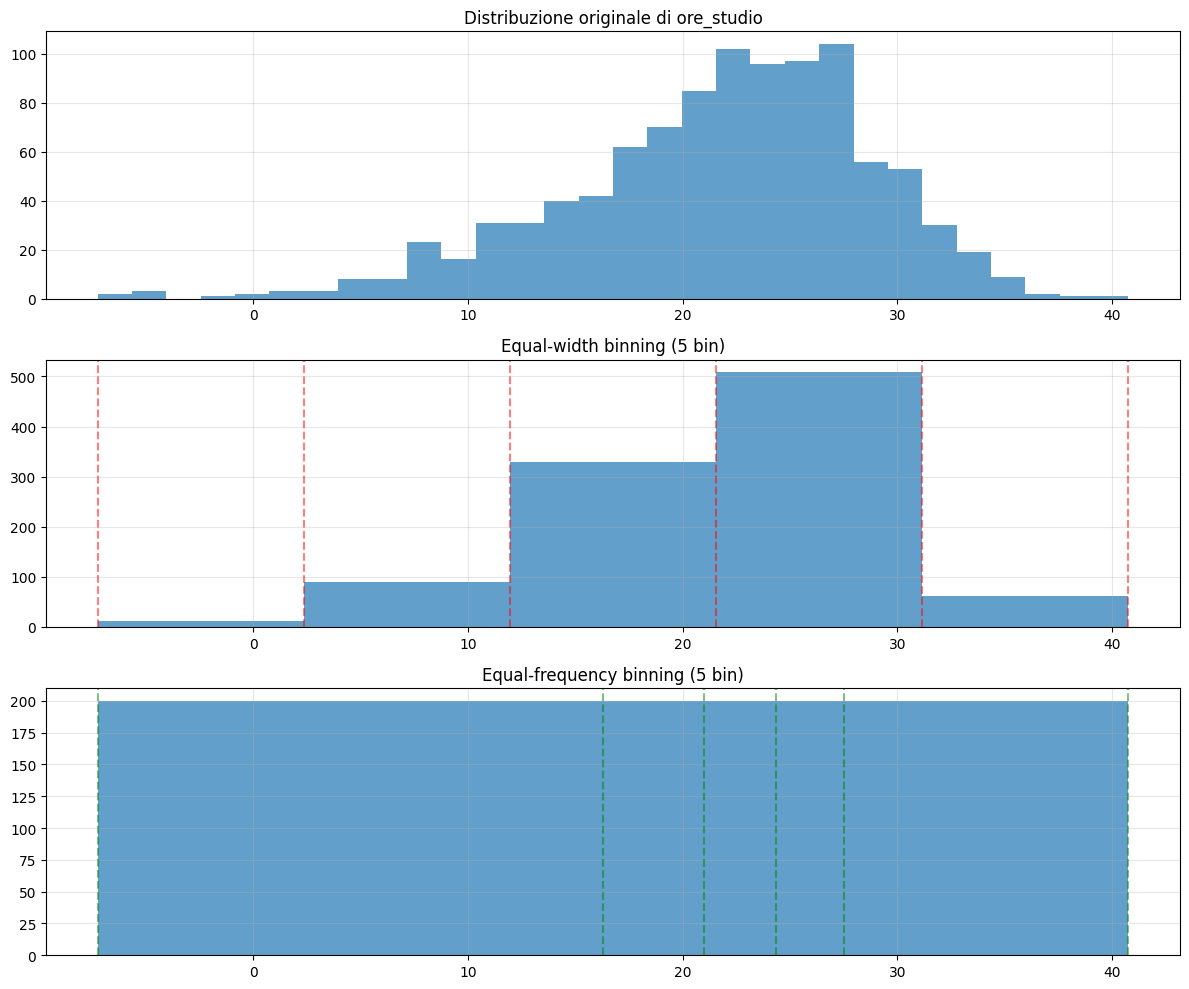


Numero di istanze in ogni bin per ore_studio:

Equal-width binning:
Bin 1: 11 istanze
Bin 2: 89 istanze
Bin 3: 330 istanze
Bin 4: 508 istanze
Bin 5: 62 istanze

Equal-frequency binning:
Bin 1: 200 istanze
Bin 2: 200 istanze
Bin 3: 200 istanze
Bin 4: 200 istanze
Bin 5: 200 istanze


In [ ]:
# Visualizziamo i risultati del binning per la caratteristica 'ore_studio'
n_bins = 5
feature = 'ore_studio'
data = df_studenti[feature].values

# Equal-width binning
bins_width, edges_width = equal_width_binning(data, n_bins=n_bins)
# Equal-frequency binning
bins_freq, edges_freq = equal_frequency_binning(data, n_bins=n_bins)

plt.figure(figsize=(12, 10))

# Istogramma dei dati originali
plt.subplot(3, 1, 1)
plt.hist(data, bins=30, alpha=0.7)
plt.title(f'Distribuzione originale di {feature}')
plt.grid(True, alpha=0.3)

# Equal-width binning
plt.subplot(3, 1, 2)
plt.hist(data, bins=edges_width, alpha=0.7)
for edge in edges_width:
    plt.axvline(edge, color='r', linestyle='--', alpha=0.5)
plt.title(f'Equal-width binning ({n_bins} bin)')
plt.grid(True, alpha=0.3)

# Equal-frequency binning
plt.subplot(3, 1, 3)
plt.hist(data, bins=edges_freq, alpha=0.7)
for edge in edges_freq:
    plt.axvline(edge, color='g', linestyle='--', alpha=0.5)
plt.title(f'Equal-frequency binning ({n_bins} bin)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Contiamo quante istanze cadono in ogni bin
print(f"\nNumero di istanze in ogni bin per {feature}:")
print("\nEqual-width binning:")
for i in range(1, n_bins + 1):
    print(f"Bin {i}: {np.sum(bins_width == i-1)} istanze")

print("\nEqual-frequency binning:")
for i in range(1, n_bins + 1):
    print(f"Bin {i}: {np.sum(bins_freq == i-1)} istanze")

In [ ]:
class BinningNaiveBayes:
    """
    Implementazione del Naive Bayes con discretizzazione (binning) per caratteristiche continue.
    
    Parametri:
    ----------
    binning_method : str, default='equal_width'
        Metodo di binning da utilizzare ('equal_width' o 'equal_frequency').
    n_bins : int, default=5
        Numero di bin da creare per ogni caratteristica continua.
    smoothing : float, default=1.0
        Parametro di smoothing per evitare probabilità zero.
    """
    
    def __init__(self, binning_method='equal_width', n_bins=5, smoothing=1.0):
        self.binning_method = binning_method
        self.n_bins = n_bins
        self.smoothing = smoothing
        self.class_priors = {}     # Probabilità a priori delle classi
        self.feature_probs = {}    # Probabilità condizionate delle feature dato la classe
        self.classes = None        # Classi possibili
        self.features = None       # Caratteristiche disponibili
        self.bin_edges = {}        # Bordi dei bin per ogni caratteristica
    
    def fit(self, X, y):
        """
        Addestra il classificatore Naive Bayes con binning.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue.
        y : Series o array-like
            Vettore delle classi.
        
        Returns:
        --------
        self : object
        """
        # Convertiamo in DataFrame per maggiore flessibilità
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        if not isinstance(y, pd.Series):
            y = pd.Series(y)
        
        self.classes = np.unique(y)
        self.features = X.columns if hasattr(X, 'columns') else range(X.shape[1])
        
        # Applichiamo il binning a ogni caratteristica
        X_binned = X.copy()
        for feature in self.features:
            data = X[feature].values
            
            if self.binning_method == 'equal_width':
                bins, bin_edges = equal_width_binning(data, n_bins=self.n_bins)
            else:  # equal_frequency
                bins, bin_edges = equal_frequency_binning(data, n_bins=self.n_bins)
            
            X_binned[feature] = bins
            self.bin_edges[feature] = bin_edges
        
        # Calcolo delle probabilità a priori delle classi
        for c in self.classes:
            self.class_priors[c] = np.mean(y == c)
            self.feature_probs[c] = {}
            
            # Calcolo delle probabilità condizionate per ogni feature discretizzata
            X_c = X_binned[y == c]
            for feature in self.features:
                self.feature_probs[c][feature] = {}
                
                # Contiamo la frequenza di ogni bin
                bin_counts = X_c[feature].value_counts()
                total_count = len(X_c)
                
                # Calcoliamo la probabilità di ogni bin con smoothing
                for bin_idx in range(self.n_bins):
                    count = bin_counts.get(bin_idx, 0)
                    # Applichiamo lo smoothing di Laplace
                    prob = (count + self.smoothing) / (total_count + self.n_bins * self.smoothing)
                    self.feature_probs[c][feature][bin_idx] = prob
        
        return self
    
    def predict_proba(self, X):
        """
        Restituisce le probabilità delle classi per i campioni in X.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples, n_classes) : Le probabilità di ogni classe per ogni campione.
        """
        # Convertiamo in DataFrame per maggiore flessibilità
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.features)
        
        # Applichiamo il binning a X
        X_binned = X.copy()
        for feature in self.features:
            data = X[feature].values
            bins = np.digitize(data, self.bin_edges[feature][1:-1])
            X_binned[feature] = bins
        
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        probas = np.zeros((n_samples, n_classes))
        
        for i, sample in X_binned.iterrows():
            for j, c in enumerate(self.classes):
                # Probabilità a priori (in log-spazio per evitare underflow)
                log_prob = np.log(self.class_priors[c])
                
                # Prodotto delle probabilità condizionate per ogni feature
                for feature in self.features:
                    bin_idx = sample[feature]
                    # Ci assicuriamo che bin_idx sia un indice valido
                    bin_idx = min(max(bin_idx, 0), self.n_bins - 1)
                    feature_prob = self.feature_probs[c][feature][bin_idx]
                    
                    # Sommiamo i logaritmi
                    log_prob += np.log(feature_prob)
                
                probas[i % n_samples, j] = log_prob
        
        # Convertiamo da log-spazio a probabilità normalizzate
        log_prob_sum = np.array([self._logsumexp(probas[i % n_samples]) for i in range(n_samples)])
        probas = np.exp(probas - log_prob_sum.reshape(-1, 1))
        
        return probas
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : DataFrame o array-like
            Matrice delle feature continue di test.
        y : Series o array-like
            Classi vere dei campioni di test.
        
        Returns:
        --------
        float : Accuratezza del classificatore.
        """
        return np.mean(self.predict(X) == y)
    
    def _logsumexp(self, a):
        """
        Calcola log(sum(exp(a))) in modo numericamente stabile.
        """
        a_max = np.max(a)
        return a_max + np.log(np.sum(np.exp(a - a_max)))

### Test del Classificatore Naive Bayes con Binning

In [ ]:
# Addestriamo e valutiamo il modello Naive Bayes con Equal-Width Binning
nb_equal_width = BinningNaiveBayes(binning_method='equal_width', n_bins=5, smoothing=1.0)
nb_equal_width.fit(X_train, y_train)
accuracy_equal_width = nb_equal_width.score(X_test, y_test)

# Addestriamo e valutiamo il modello Naive Bayes con Equal-Frequency Binning
nb_equal_freq = BinningNaiveBayes(binning_method='equal_frequency', n_bins=5, smoothing=1.0)
nb_equal_freq.fit(X_train, y_train)
accuracy_equal_freq = nb_equal_freq.score(X_test, y_test)

print(f"\nAccuratezza del Naive Bayes con Equal-Width Binning: {accuracy_equal_width:.4f}")
print(f"Accuratezza del Naive Bayes con Equal-Frequency Binning: {accuracy_equal_freq:.4f}")
print(f"Accuratezza del Naive Bayes Gaussiano: {accuracy:.4f}")



Accuratezza del Naive Bayes con Equal-Width Binning: 0.5300
Accuratezza del Naive Bayes con Equal-Frequency Binning: 0.5067
Accuratezza del Naive Bayes Gaussiano: 0.5267


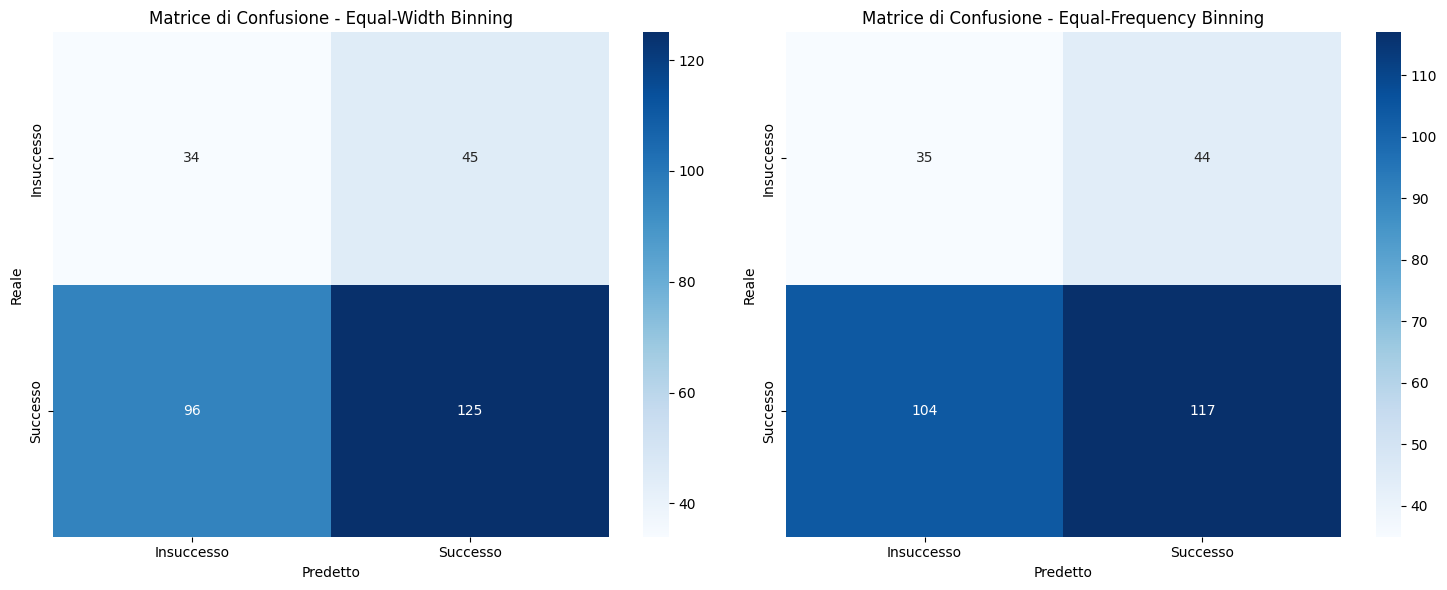

In [ ]:
# Calcoliamo le matrici di confusione
y_pred_equal_width = nb_equal_width.predict(X_test)
y_pred_equal_freq = nb_equal_freq.predict(X_test)

conf_matrix_equal_width = confusion_matrix(y_test, y_pred_equal_width)
conf_matrix_equal_freq = confusion_matrix(y_test, y_pred_equal_freq)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matrice di confusione per Equal-Width Binning
sns.heatmap(conf_matrix_equal_width, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Insuccesso', 'Successo'],
            yticklabels=['Insuccesso', 'Successo'],
            ax=axes[0])
axes[0].set_xlabel('Predetto')
axes[0].set_ylabel('Reale')
axes[0].set_title('Matrice di Confusione - Equal-Width Binning')

# Matrice di confusione per Equal-Frequency Binning
sns.heatmap(conf_matrix_equal_freq, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Insuccesso', 'Successo'],
            yticklabels=['Insuccesso', 'Successo'],
            ax=axes[1])
axes[1].set_xlabel('Predetto')
axes[1].set_ylabel('Reale')
axes[1].set_title('Matrice di Confusione - Equal-Frequency Binning')

plt.tight_layout()
plt.show()

In [ ]:
# Mostriamo il classification report per entrambi i metodi
print("\nClassification Report - Equal-Width Binning:")
print(classification_report(y_test, y_pred_equal_width, target_names=['Insuccesso', 'Successo']))

print("\nClassification Report - Equal-Frequency Binning:")
print(classification_report(y_test, y_pred_equal_freq, target_names=['Insuccesso', 'Successo']))



Classification Report - Equal-Width Binning:
              precision    recall  f1-score   support

  Insuccesso       0.26      0.43      0.33        79
    Successo       0.74      0.57      0.64       221

    accuracy                           0.53       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.61      0.53      0.56       300


Classification Report - Equal-Frequency Binning:
              precision    recall  f1-score   support

  Insuccesso       0.25      0.44      0.32        79
    Successo       0.73      0.53      0.61       221

    accuracy                           0.51       300
   macro avg       0.49      0.49      0.47       300
weighted avg       0.60      0.51      0.54       300



## 5.5 Confronto degli Approcci

Confrontiamo i tre approcci (Gaussiano, Equal-Width Binning, Equal-Frequency Binning) in termini di accuratezza per diversi numeri di bin:


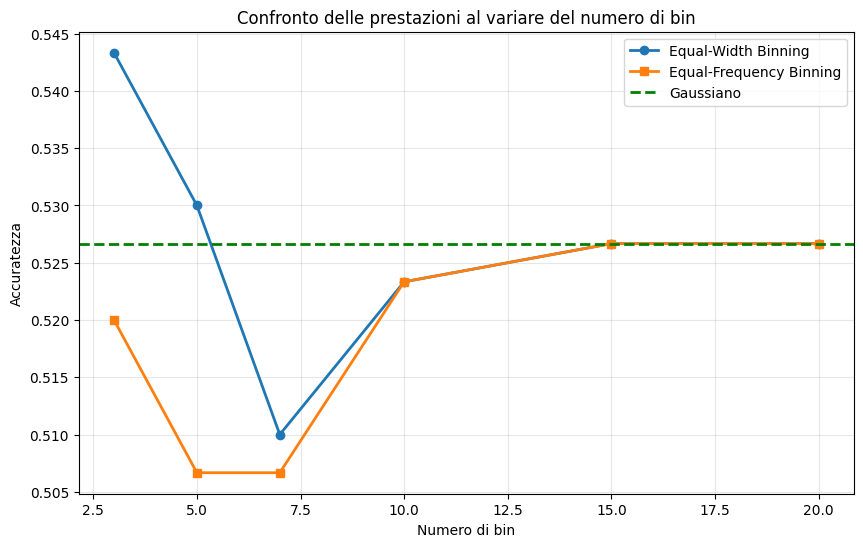


Confrontro delle accuratezze:
  Numero di bin  Equal-Width Binning  Equal-Frequency Binning  Gaussiano
0             3             0.543333                 0.520000        NaN
1             5             0.530000                 0.506667        NaN
2             7             0.510000                 0.506667        NaN
3            10             0.523333                 0.523333        NaN
4            15             0.526667                 0.526667        NaN
5            20             0.526667                 0.526667        NaN
6           N/A                  NaN                      NaN   0.526667

Pro e contro degli approcci per caratteristiche continue:

1. Naive Bayes Gaussiano:
   Pro:
   - Non richiede discretizzazione
   - Mantiene la granularità dei dati originali
   - Spesso più accurato quando le distribuzioni sono effettivamente gaussiane
   Contro:
   - Assume distribuzioni gaussiane (non sempre vero)
   - Sensibile agli outlier
   - Richiede abbastanza dati per st

In [ ]:
# Confrontiamo le prestazioni dei diversi approcci al variare del numero di bin
n_bins_values = [3, 5, 7, 10, 15, 20]
accuracies_equal_width = []
accuracies_equal_freq = []

for n_bins in n_bins_values:
    # Equal-Width Binning
    nb_equal_width = BinningNaiveBayes(binning_method='equal_width', n_bins=n_bins, smoothing=1.0)
    nb_equal_width.fit(X_train, y_train)
    accuracy_equal_width = nb_equal_width.score(X_test, y_test)
    accuracies_equal_width.append(accuracy_equal_width)
    
    # Equal-Frequency Binning
    nb_equal_freq = BinningNaiveBayes(binning_method='equal_frequency', n_bins=n_bins, smoothing=1.0)
    nb_equal_freq.fit(X_train, y_train)
    accuracy_equal_freq = nb_equal_freq.score(X_test, y_test)
    accuracies_equal_freq.append(accuracy_equal_freq)

# Creiamo un grafico di confronto
plt.figure(figsize=(10, 6))
plt.plot(n_bins_values, accuracies_equal_width, 'o-', label='Equal-Width Binning', linewidth=2)
plt.plot(n_bins_values, accuracies_equal_freq, 's-', label='Equal-Frequency Binning', linewidth=2)
plt.axhline(y=accuracy, color='g', linestyle='--', label='Gaussiano', linewidth=2)

plt.xlabel('Numero di bin')
plt.ylabel('Accuratezza')
plt.title('Confronto delle prestazioni al variare del numero di bin')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Creiamo una tabella di confronto
results = {
    'Numero di bin': n_bins_values + ['N/A'],
    'Equal-Width Binning': accuracies_equal_width + [None],
    'Equal-Frequency Binning': accuracies_equal_freq + [None],
    'Gaussiano': [None] * len(n_bins_values) + [accuracy]
}

df_results = pd.DataFrame(results)
print("\nConfrontro delle accuratezze:")
print(df_results)

# Evidenziamo i pro e i contro di ogni approccio
print("\nPro e contro degli approcci per caratteristiche continue:")
print("\n1. Naive Bayes Gaussiano:")
print("   Pro:")
print("   - Non richiede discretizzazione")
print("   - Mantiene la granularità dei dati originali")
print("   - Spesso più accurato quando le distribuzioni sono effettivamente gaussiane")
print("   Contro:")
print("   - Assume distribuzioni gaussiane (non sempre vero)")
print("   - Sensibile agli outlier")
print("   - Richiede abbastanza dati per stimare media e varianza")

print("\n2. Equal-Width Binning:")
print("   Pro:")
print("   - Semplice da implementare e interpretare")
print("   - Bin di larghezza uniforme")
print("   - Robusto a piccole variazioni nei dati")
print("   Contro:")
print("   - Può creare bin con poche istanze")
print("   - Sensibile agli outlier")
print("   - Perde precisione nei dettagli fini")

print("\n3. Equal-Frequency Binning:")
print("   Pro:")
print("   - Distribuzione uniforme delle istanze tra i bin")
print("   - Meno sensibile agli outlier")
print("   - Funziona bene con distribuzioni non uniformi")
print("   Contro:")
print("   - Può raggruppare valori molto diversi nello stesso bin")
print("   - Perde precisione nei dettagli fini")
print("   - Bin di larghezza non uniforme, potenzialmente difficili da interpretare")

## 5.6 Caso d'uso: Previsione del successo accademico

Utilizziamo il modello addestrato per fare predizioni su nuovi studenti:

In [ ]:
# Definiamo alcuni profili di studenti e prevediamo il loro successo
nuovi_studenti = pd.DataFrame({
    'ore_studio': [10, 20, 30, 15, 25],
    'media_precedente': [5.0, 7.0, 8.5, 6.0, 7.5],
    'qualita_sonno': [5.0, 7.0, 8.0, 6.0, 7.5]
})
nuovi_studenti['descrizione'] = [
    'Studente con poche ore di studio, media bassa e poco sonno',
    'Studente con ore di studio medie, buona media e buon sonno',
    'Studente con molte ore di studio, ottima media e ottimo sonno',
    'Studente con ore di studio sotto la media, media sufficiente e sonno medio',
    'Studente con buone ore di studio, buona media e buon sonno'
]

print("Nuovi profili di studenti:")
print(nuovi_studenti[['descrizione', 'ore_studio', 'media_precedente', 'qualita_sonno']])

Nuovi profili di studenti:
                                         descrizione  ore_studio  \
0  Studente con poche ore di studio, media bassa ...          10   
1  Studente con ore di studio medie, buona media ...          20   
2  Studente con molte ore di studio, ottima media...          30   
3  Studente con ore di studio sotto la media, med...          15   
4  Studente con buone ore di studio, buona media ...          25   

   media_precedente  qualita_sonno  
0               5.0            5.0  
1               7.0            7.0  
2               8.5            8.0  
3               6.0            6.0  
4               7.5            7.5  


In [ ]:
# Facciamo predizioni con i tre modelli
prob_gaussian = gnb.predict_proba(nuovi_studenti[['ore_studio', 'media_precedente', 'qualita_sonno']])
prob_equal_width = nb_equal_width.predict_proba(nuovi_studenti[['ore_studio', 'media_precedente', 'qualita_sonno']])
prob_equal_freq = nb_equal_freq.predict_proba(nuovi_studenti[['ore_studio', 'media_precedente', 'qualita_sonno']])

# Creiamo un DataFrame con i risultati
risultati = pd.DataFrame({
    'descrizione': nuovi_studenti['descrizione'],
    'P(successo) - Gaussiano': prob_gaussian[:, 1],
    'P(successo) - Equal-Width': prob_equal_width[:, 1],
    'P(successo) - Equal-Freq': prob_equal_freq[:, 1],
    'Predizione - Gaussiano': ['Successo' if p > 0.5 else 'Insuccesso' for p in prob_gaussian[:, 1]],
    'Predizione - Equal-Width': ['Successo' if p > 0.5 else 'Insuccesso' for p in prob_equal_width[:, 1]],
    'Predizione - Equal-Freq': ['Successo' if p > 0.5 else 'Insuccesso' for p in prob_equal_freq[:, 1]]
})



Risultati delle predizioni:
                                                                  descrizione  \
0                  Studente con poche ore di studio, media bassa e poco sonno   
1                  Studente con ore di studio medie, buona media e buon sonno   
2               Studente con molte ore di studio, ottima media e ottimo sonno   
3  Studente con ore di studio sotto la media, media sufficiente e sonno medio   
4                  Studente con buone ore di studio, buona media e buon sonno   

   P(successo) - Gaussiano  P(successo) - Equal-Width  \
0                 0.000694                   0.004332   
1                 0.913433                   0.953047   
2                 0.996022                   0.998388   
3                 0.166849                   0.366020   
4                 0.985980                   0.988352   

   P(successo) - Equal-Freq Predizione - Gaussiano Predizione - Equal-Width  \
0                  0.001084             Insuccesso            

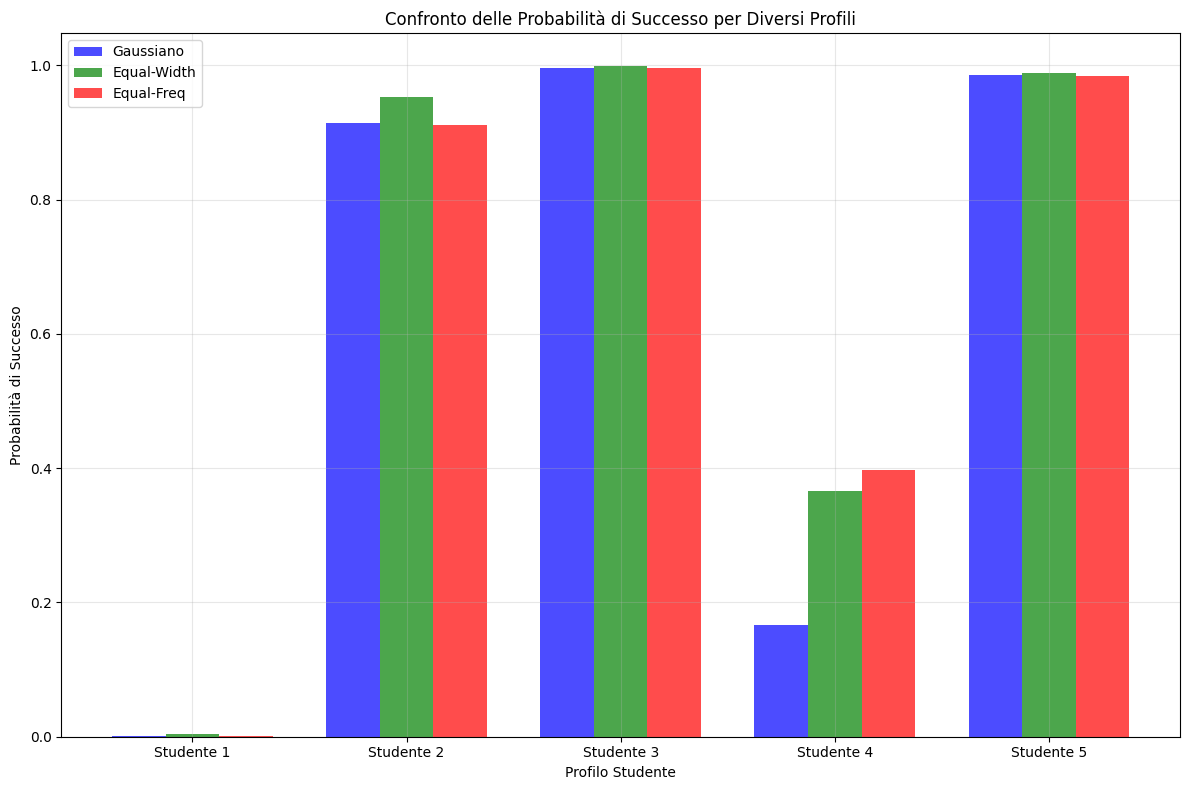

In [ ]:
print("\nRisultati delle predizioni:")
pd.set_option('display.max_colwidth', 80)
print(risultati)

# Visualizziamo i risultati
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(nuovi_studenti))

plt.bar(index, prob_gaussian[:, 1], bar_width, label='Gaussiano', color='blue', alpha=0.7)
plt.bar(index + bar_width, prob_equal_width[:, 1], bar_width, label='Equal-Width', color='green', alpha=0.7)
plt.bar(index + 2*bar_width, prob_equal_freq[:, 1], bar_width, label='Equal-Freq', color='red', alpha=0.7)

plt.xlabel('Profilo Studente')
plt.ylabel('Probabilità di Successo')
plt.title('Confronto delle Probabilità di Successo per Diversi Profili')
plt.xticks(index + bar_width, [f'Studente {i+1}' for i in range(len(nuovi_studenti))])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5.7 Conclusioni

In questa sezione abbiamo esplorato due approcci principali per gestire caratteristiche continue nel Naive Bayes:

1. **Modellazione diretta con distribuzioni gaussiane**: Funziona bene quando i dati seguono effettivamente una distribuzione normale.

2. **Discretizzazione (binning)**: Converte caratteristiche continue in categoriche, con due varianti:
   - **Equal-Width Binning**: Intervalli di uguale ampiezza
   - **Equal-Frequency Binning**: Stesso numero di istanze in ogni intervallo

La scelta dell'approccio dipende dalla distribuzione dei dati e dal problema specifico. Nel nostro caso, il Naive Bayes Gaussiano ha ottenuto risultati migliori, ma questo non è sempre il caso. È buona pratica testare diversi approcci e scegliere quello che funziona meglio per il dataset specifico.

In generale:
- Il Naive Bayes Gaussiano è una buona scelta quando le caratteristiche seguono approssimativamente una distribuzione normale.
- L'Equal-Frequency Binning è spesso preferibile all'Equal-Width Binning, perché è più robusto verso gli outlier e distribuzioni non uniformi.
- Il numero di bin è un parametro importante da ottimizzare, tipicamente mediante cross-validation.